## Aula 9 - Processamento morfológico

Neste notebook iremos usar os métodos do OpenCV para processamento morfológico.

Vamos importar as bibliotecas necessárias:

In [4]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/j.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/j_closing.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/j_opening.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/cosmic.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/road.jpg

--2021-06-16 23:27:13--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/j.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1.1K) [image/png]
Saving to: ‘j.png.1’

j.png.1             100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-06-16 23:27:13 (48.0 MB/s) - ‘j.png.1’ saved [1126/1126]

--2021-06-16 23:27:13--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/j_closing.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2055 (2.0K) [image/png]
Saving to: ‘j_closing.png.

Vamos carregar a nossa imagem de testes e definir os kernels que serão usados no notebook:

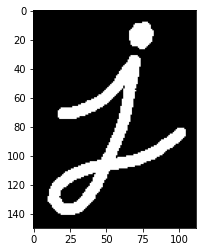

In [ ]:
img = cv2.imread('j.png', 0)
plt.imshow(img, cmap="gray")

In [5]:
'''
-> Retangulo
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

-> Cruz
array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

-> Elipse
array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)
'''

kernels = {
    'retangulo': cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),
    'elipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
    'cruz': cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
}

### 9.1 Erosion

Para fazer a erosão usaremos o método [cv2.erode()](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb). Como argumento passaremos a imagem, o kernel que vamos usar, e a quantidade de vezes (iterações) que queremos usar o erode na imagem.

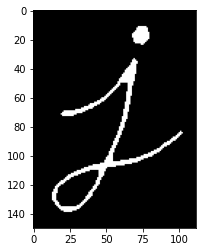

In [6]:
eroded_img = cv2.erode(img, kernels['retangulo'],iterations = 1)
plt.imshow(eroded_img, cmap="gray")

Podemos, ainda, comparar os kernels e mudar o número de iterações:

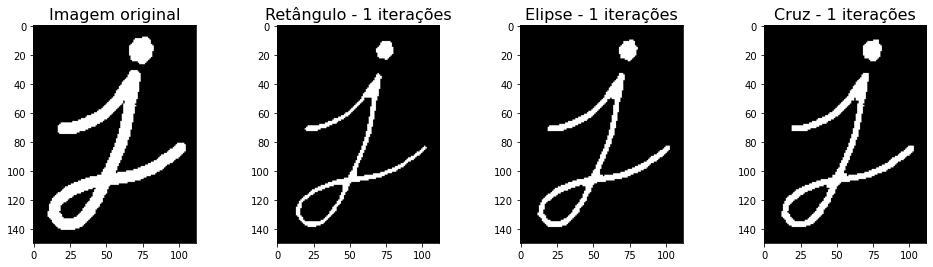

In [8]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 4, figsize=(16, 9))
fig.subplots_adjust(hspace=0, wspace=0.5)
  
ax[0].set_title("Imagem original", fontsize=16)
ax[0].imshow(img, cmap='gray')

ax[1].set_title(f"Retângulo - {i} iterações", fontsize=16)
ax[1].imshow(cv2.erode(img, kernels['retangulo'], iterations = i), cmap='gray')

ax[2].set_title(f"Elipse - {i} iterações", fontsize=16)
ax[2].imshow(cv2.erode(img, kernels['elipse'], iterations = i), cmap='gray')

ax[3].set_title(f"Cruz - {i} iterações", fontsize=16)
ax[3].imshow(cv2.erode(img, kernels['cruz'], iterations = i), cmap='gray')
  

### 9.2 Dilation

Para dilatar a imagem, use o método [cv2.dilate()](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c). Os argumentos são iguais aos do erode.

1054170

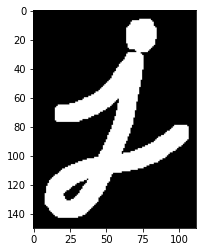

In [ ]:
dilated_img = None
plt.imshow(dilated_img, 'gray')

In [ ]:
if np.sum(dilated_img) == 1054170:
  print("Correto!")
else:
  print("Revise o código")

Correto!


### 9.3 Opening

Para a operação de *opening*, usaremos o método [cv2.morphologyEx()](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f). Este método recebe além da imagem original, a morfologia a ser aplicada como uma flag e o kernel.

Há diferentes tipos de operações morfológicas que podem ser aplicadas, nesse caso, usaremos o [cv2.MORPH_OPEN](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32)

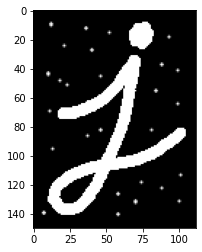

In [ ]:
img = cv2.imread('j_opening.png', 0)
plt.imshow(img, cmap="gray")

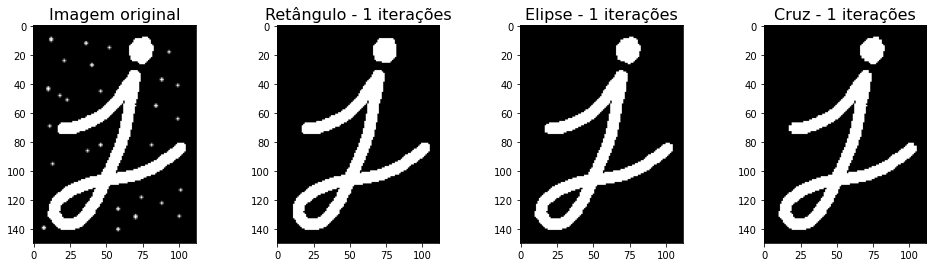

In [ ]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 4, figsize=(16, 9))
fig.subplots_adjust(hspace=0, wspace=0.5)
  
ax[0].set_title("Imagem original", fontsize=16)
ax[0].imshow(img, cmap='gray')

ax[1].set_title(f"Retângulo - {i} iterações", fontsize=16)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernels['retangulo'], iterations = i), cmap='gray')

ax[2].set_title(f"Elipse - {i} iterações", fontsize=16)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernels['elipse'], iterations = i), cmap='gray')

ax[3].set_title(f"Cruz - {i} iterações", fontsize=16)
ax[3].imshow(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernels['cruz'], iterations = i), cmap='gray')
  

### 9.4 Closing

Aplique o mesmo método anterior, porém altere a flag para obter uma operação de *Closing*. Utilize um dos kernels aplicados até o momento e uma única iteração.

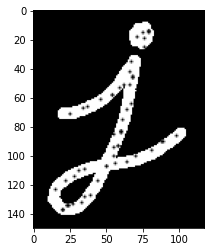

In [ ]:
img = cv2.imread('j_closing.png', 0)
plt.imshow(img, cmap="gray")

In [ ]:
closing = None
plt.imshow(closing, 'gray')

In [ ]:
if np.sum(closing) == 664501 or 661526 or 660452:
  print("Correto!")
else:
  print("Revise o código")

### 9.5 Gradiente morfológico

O gradiente morfológico também é executado pelo método cv2.morphologyEx. Mudaremos novamente a flag, agora sendo [cv2.MORPH_GRADIENT](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).

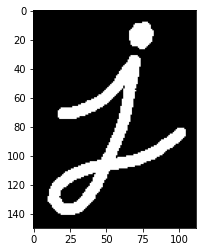

In [ ]:
img = cv2.imread('j.png', 0)
plt.imshow(img, cmap="gray")

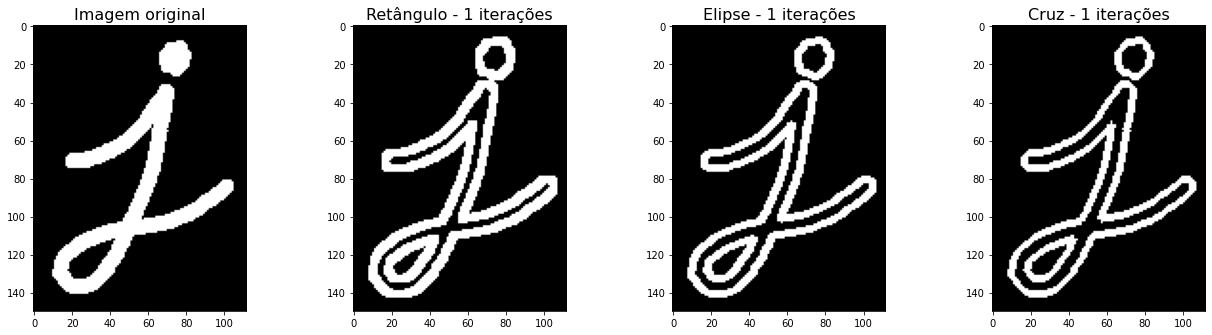

In [ ]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 4, figsize=(21, 16))
fig.subplots_adjust(hspace=0, wspace=0.5)
  
ax[0].set_title("Imagem original", fontsize=16)
ax[0].imshow(img, cmap='gray')

ax[1].set_title(f"Retângulo - {i} iterações", fontsize=16)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernels['retangulo'], iterations = i), cmap='gray')

ax[2].set_title(f"Elipse - {i} iterações", fontsize=16)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernels['elipse'], iterations = i), cmap='gray')

ax[3].set_title(f"Cruz - {i} iterações", fontsize=16)
ax[3].imshow(cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernels['cruz'], iterations = i), cmap='gray')
  

### 9.6 Top hat

Continuaremos usando o mesmo método, mas com a flag [cv2.MORPH_TOPHAT](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).

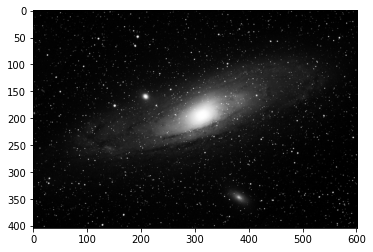

In [ ]:
img = cv2.imread('cosmic.png', 0)
plt.imshow(img, cmap="gray")

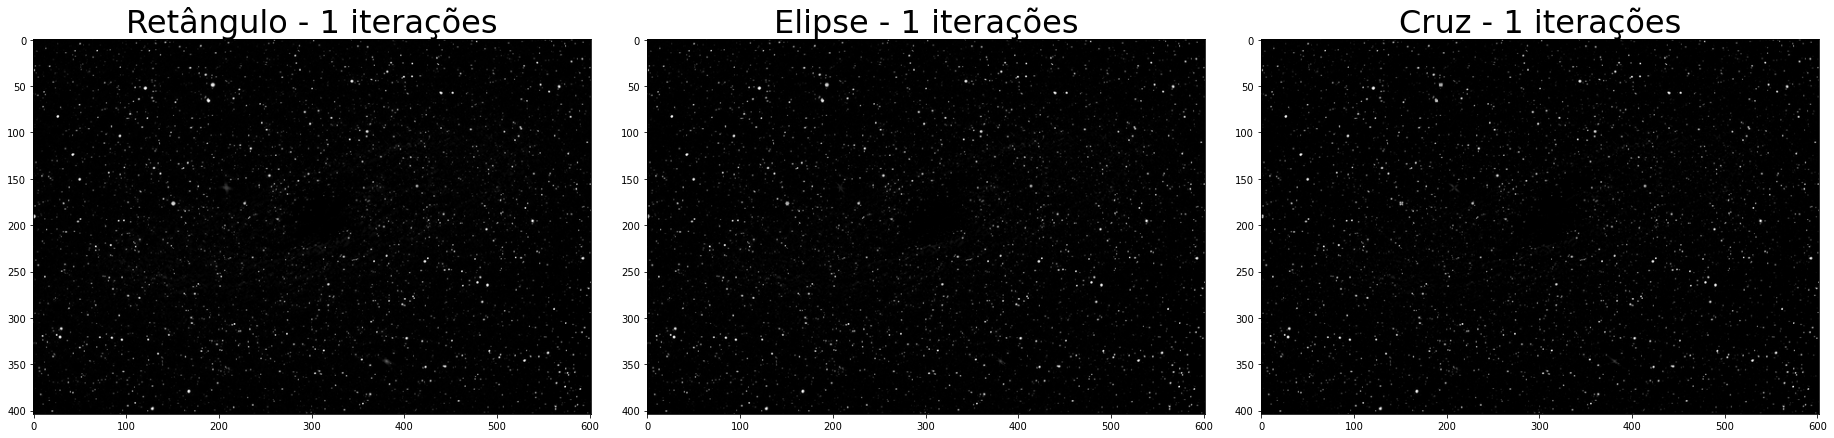

In [ ]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 3, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.1)

ax[0].set_title(f"Retângulo - {i} iterações", fontsize=32)
ax[0].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels['retangulo'], iterations = i), cmap='gray')

ax[1].set_title(f"Elipse - {i} iterações", fontsize=32)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels['elipse'], iterations = i), cmap='gray')

ax[2].set_title(f"Cruz - {i} iterações", fontsize=32)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels['cruz'], iterations = i), cmap='gray')
  

O top hat é altamente afetado pelo tamanho do kernel. Vamos alterar os valores e ver o comportamento:

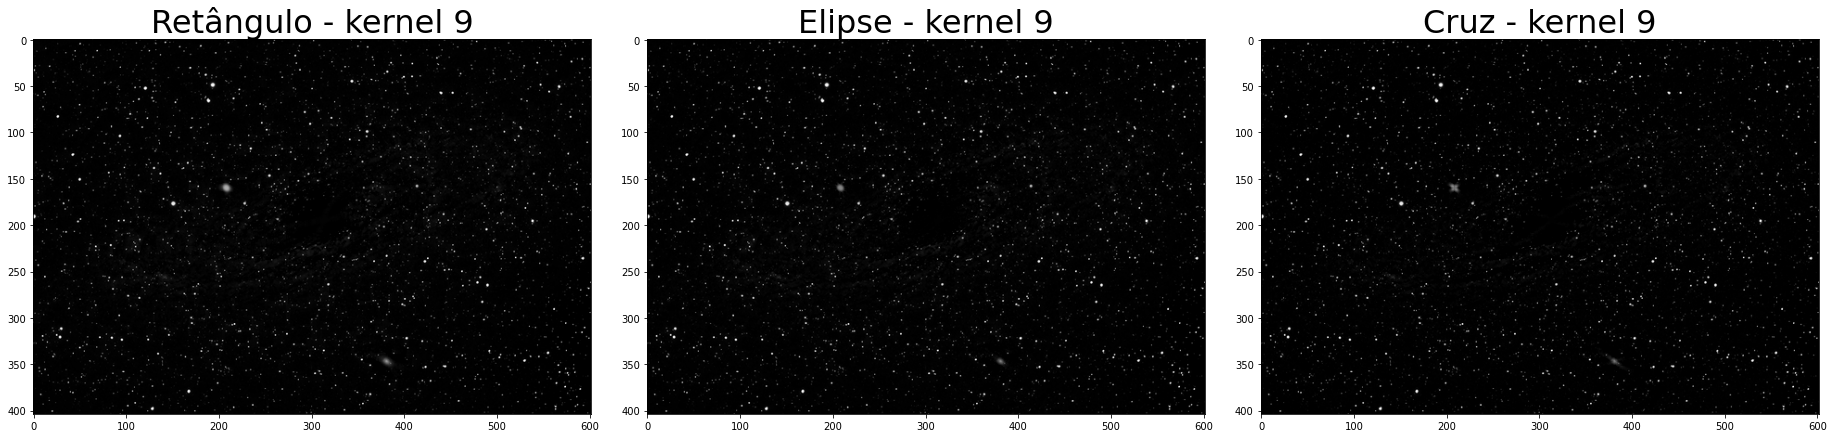

In [ ]:
kernel_size = 9 #@param {type:"slider", min:3, max:9, step:2}

kernels_tophat = {
    'retangulo': cv2.getStructuringElement(cv2.MORPH_RECT,(kernel_size, kernel_size)),
    'elipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size, kernel_size)),
    'cruz': cv2.getStructuringElement(cv2.MORPH_CROSS,(kernel_size, kernel_size))
}

fig, ax = plt.subplots(1, 3, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.1)

ax[0].set_title(f"Retângulo - kernel {kernel_size}", fontsize=32)
ax[0].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels_tophat['retangulo'], iterations = i), cmap='gray')

ax[1].set_title(f"Elipse - kernel {kernel_size}", fontsize=32)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels_tophat['elipse'], iterations = i), cmap='gray')

ax[2].set_title(f"Cruz - kernel {kernel_size}", fontsize=32)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernels_tophat['cruz'], iterations = i), cmap='gray')
  

### 9.7 Black hat

A última flag a ser vista para este método é a [cv2.MORPH_BLACKHAT](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).

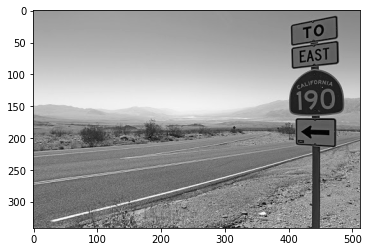

In [ ]:
img = cv2.imread('road.jpg', 0)
plt.imshow(img, cmap="gray")

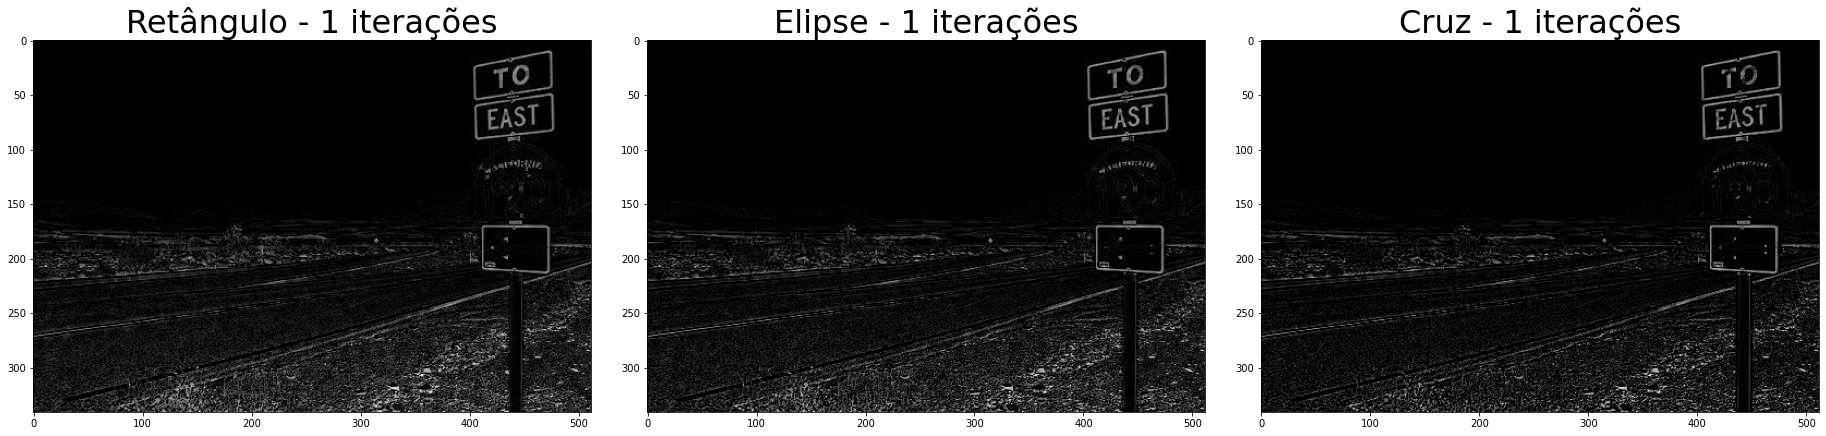

In [ ]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 3, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.1)

ax[0].set_title(f"Retângulo - {i} iterações", fontsize=32)
ax[0].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels['retangulo'], iterations = i), cmap='gray')

ax[1].set_title(f"Elipse - {i} iterações", fontsize=32)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels['elipse'], iterations = i), cmap='gray')

ax[2].set_title(f"Cruz - {i} iterações", fontsize=32)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels['cruz'], iterations = i), cmap='gray')
  

Assim como o top hat, o black hat também é muito afetado pelo tamanho do kernel:

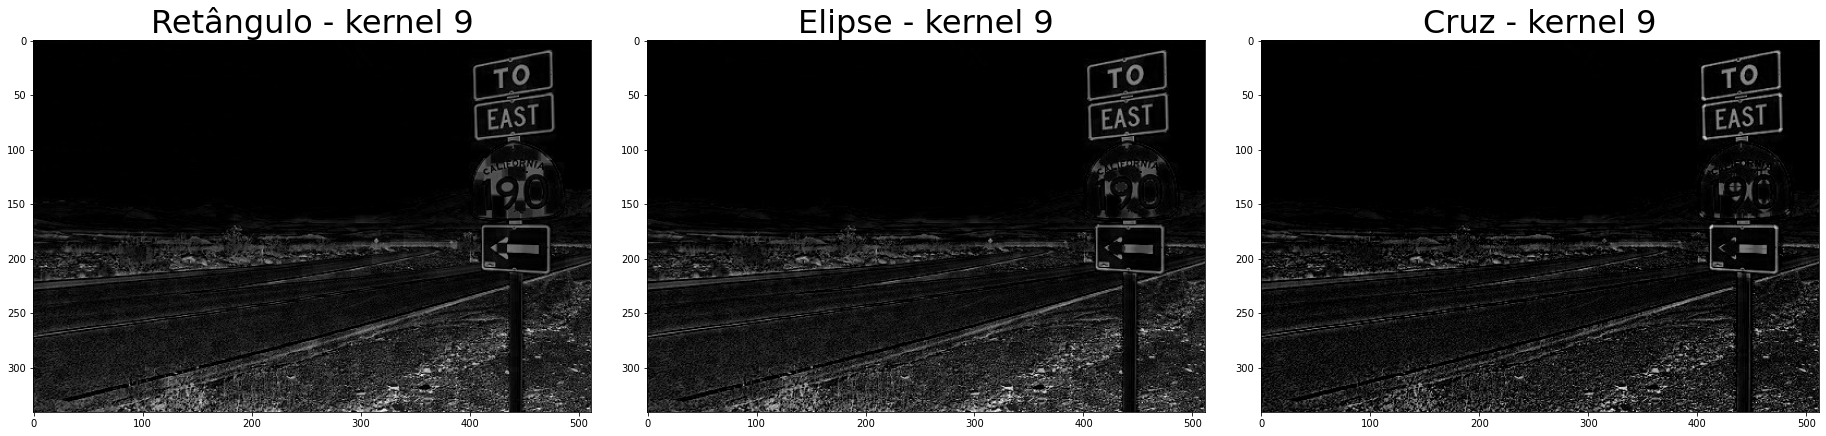

In [ ]:
kernel_size = 5 #@param {type:"slider", min:3, max:9, step:2}

kernels_tophat = {
    'retangulo': cv2.getStructuringElement(cv2.MORPH_RECT,(kernel_size, kernel_size)),
    'elipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size, kernel_size)),
    'cruz': cv2.getStructuringElement(cv2.MORPH_CROSS,(kernel_size, kernel_size))
}

fig, ax = plt.subplots(1, 3, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0.1)

ax[0].set_title(f"Retângulo - kernel {kernel_size}", fontsize=32)
ax[0].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels_tophat['retangulo'], iterations = i), cmap='gray')

ax[1].set_title(f"Elipse - kernel {kernel_size}", fontsize=32)
ax[1].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels_tophat['elipse'], iterations = i), cmap='gray')

ax[2].set_title(f"Cruz - kernel {kernel_size}", fontsize=32)
ax[2].imshow(cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernels_tophat['cruz'], iterations = i), cmap='gray')
  

### 9.8 Esqueletização

O processo de esqueletização é um pouco mais complicado. Vamos usar o algoritmo disponível [aqui](http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/), com alguns comentários e adaptações:

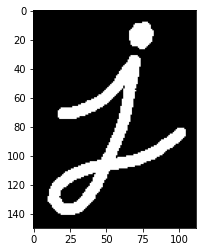

In [2]:
img = cv2.imread('j.png', 0)
plt.imshow(img, cmap="gray")

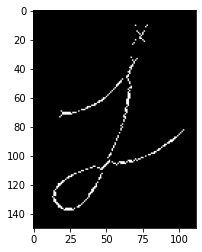

In [ ]:
import cv2
import numpy as np

def skel(img):
    skel = np.zeros(img.shape, np.uint8)
    ret, img = cv2.threshold(img, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False #booleano para checar se tem pelo menos 1 pixel sobrando
    while(not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element) # tempo = opening(eroded)
        temp = cv2.subtract(img,temp) # subtrai a parte
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy() # em cada iteracao a imagem eh erodida para refinar o skeleton

        if (cv2.countNonZero(img) == 0): # quantidade de pixels brancos != 0
            done = True
    
    return skel
            
plt.imshow(skel(img), cmap="gray")

Hoje em dia o OpenCV tem uma implementação de esqueletização, [cv2.ximgproc.thinning](https://docs.opencv.org/4.4.0/df/d2d/group__ximgproc.html#ga37002c6ca80c978edb6ead5d6b39740c), em seu módulo de Processamento de Imagem Estendido.

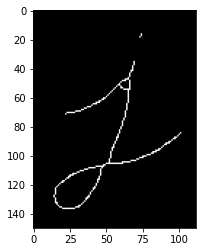

In [3]:
th = cv2.ximgproc.thinning(img)
plt.imshow(th, 'gray')

### 9.9 Exemplo: ressaltar contornos

Podemos subtrair a erosão da imagem original pra ter os contornos ressaltados. Faremos isso usando o mesmo código que usamos na parte de erosão, comparando os elementos estruturantes e as iterações:

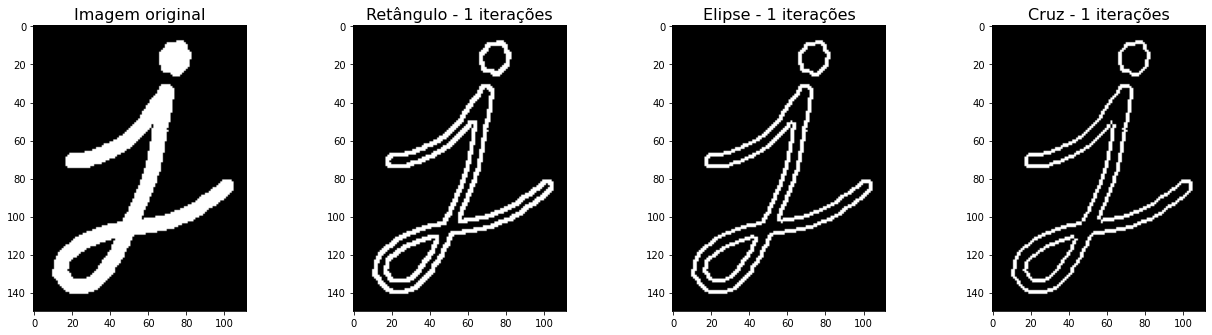

In [ ]:
i = 1 #@param {type:"slider", min:1, max:5, step:1}

fig, ax = plt.subplots(1, 4, figsize=(21, 16))
fig.subplots_adjust(hspace=0, wspace=0.5)
  
ax[0].set_title("Imagem original", fontsize=16)
ax[0].imshow(img, cmap='gray')

ax[1].set_title(f"Retângulo - {i} iterações", fontsize=16)
ax[1].imshow(img - cv2.erode(img,kernels['retangulo'],iterations = i), cmap='gray')

ax[2].set_title(f"Elipse - {i} iterações", fontsize=16)
ax[2].imshow(img - cv2.erode(img,kernels['elipse'],iterations = i), cmap='gray')

ax[3].set_title(f"Cruz - {i} iterações", fontsize=16)
ax[3].imshow(img - cv2.erode(img,kernels['cruz'],iterations = i), cmap='gray')  